### PSMNet inference:

In [ ]:
!git clone https://github.com/JiaRenChang/PSMNet.git
%cd PSMNet
!gdown https://drive.google.com/u/0/uc?id=1pHWjmhKMG4ffCrpcsp_MTXMJXhgl3kF9&export=download

In [ ]:
!python Test_img.py --loadmodel pretrained_model_KITTI2015.tar --leftimg sample2/left.png --rightimg sample2/right.png

### Get disparity:

In [ ]:
import cv2
from matplotlib import pyplot as plt
import kitti_util as utils
import numpy as np
from tqdm.auto import tqdm

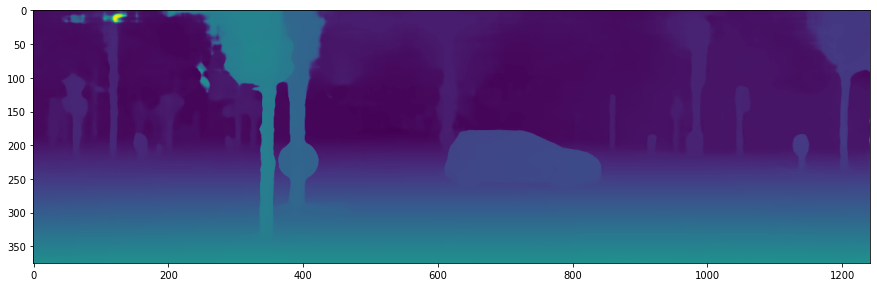

In [155]:
disp = cv2.imread('Test_disparity.png', cv2.IMREAD_UNCHANGED)
disp_float = disp.astype(float) / 256

plt.figure(figsize=(15, 9))
plt.imshow(disp_float)
plt.show()

### Get depth:

In [28]:
calib = utils.Calibration('calib.txt')
focal_len = calib.f_u
baseline = 0.54
im_size = max(disp.shape)

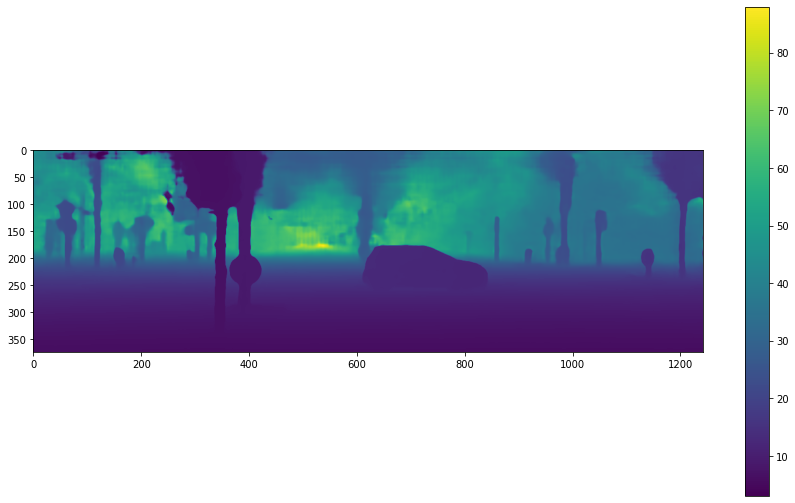

In [158]:
depth = baseline * focal_len / (disp_float)

plt.figure(figsize=(15, 9))
plt.imshow(depth)
plt.colorbar()
plt.show()

### Project to BEV:

In [200]:
xx, yy = np.meshgrid(np.arange(depth.shape[1]), np.arange(depth.shape[0]))
xx, yy = xx.astype(float), yy.astype(float)
xx, yy = yy, xx

xyz = np.stack([xx, yy, depth], axis=2)
velo_pts = xyz.reshape((-1, 3))
velo_pts = calib.project_image_to_velo(velo_pts)

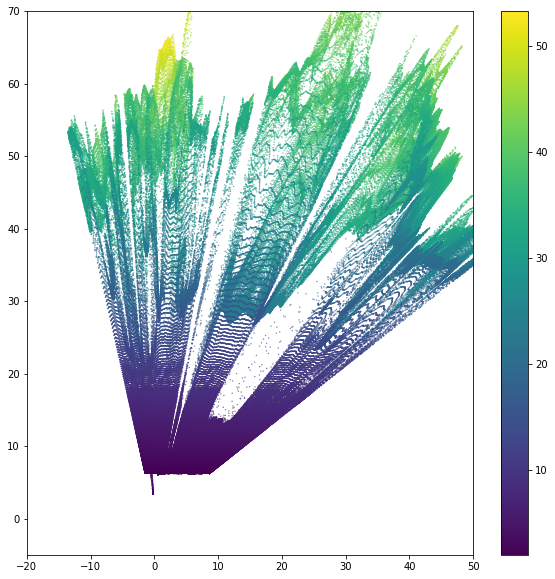

In [209]:
plt.figure(figsize=(10, 10))
plt.scatter(-velo_pts[:, 2], velo_pts[:, 0], c=velo_pts[:, 1], s=0.1)
plt.colorbar()
plt.ylim(-5, 70)
plt.xlim(-20, 50)
plt.show()

### Draw in 3D:

In [106]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from glob import glob
import os
import skimage.filters as flts
from skimage.io import imread

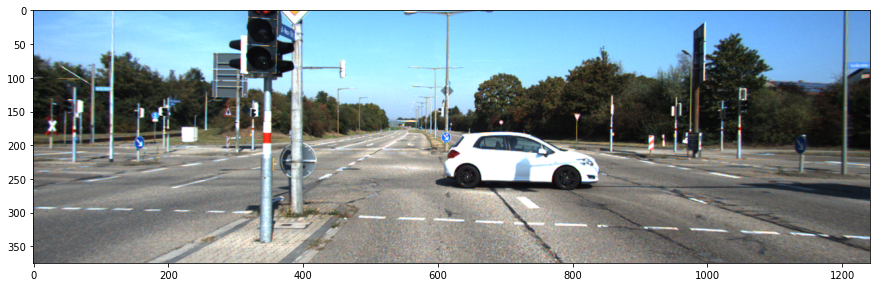

In [113]:
img = cv2.imread('sample2/left.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,10))
plt.imshow(img)

In [109]:
d = np.flipud(depth)
img = np.flipud(img)


CPU times: user 37.5 s, sys: 828 ms, total: 38.3 s
Wall time: 37.6 s


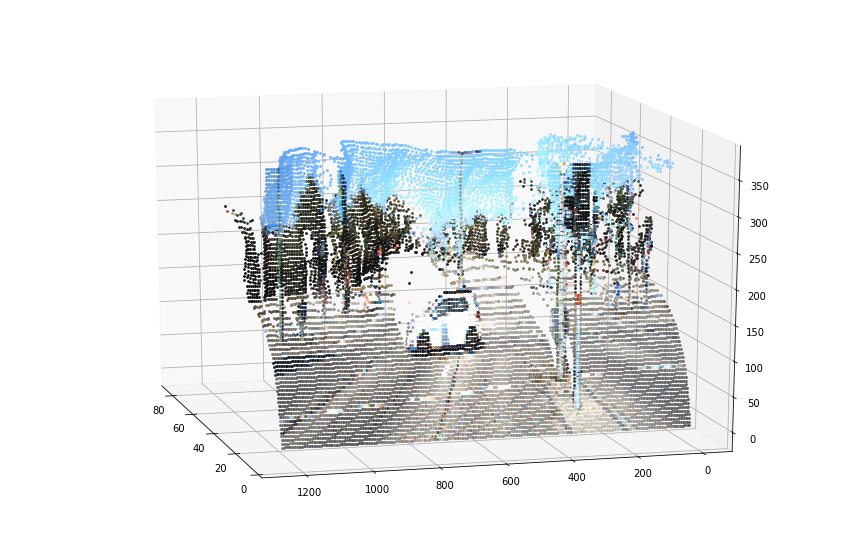

In [111]:
%%time
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

STEP = 5
for x in tqdm(range(0, img.shape[0], STEP)):
    for y in range(0, img.shape[1], STEP):
        ax.scatter(
            d[x,y], y, x,
            c=[tuple(img[x, y, :3]/255)], s=3)      
    ax.view_init(15, 165)

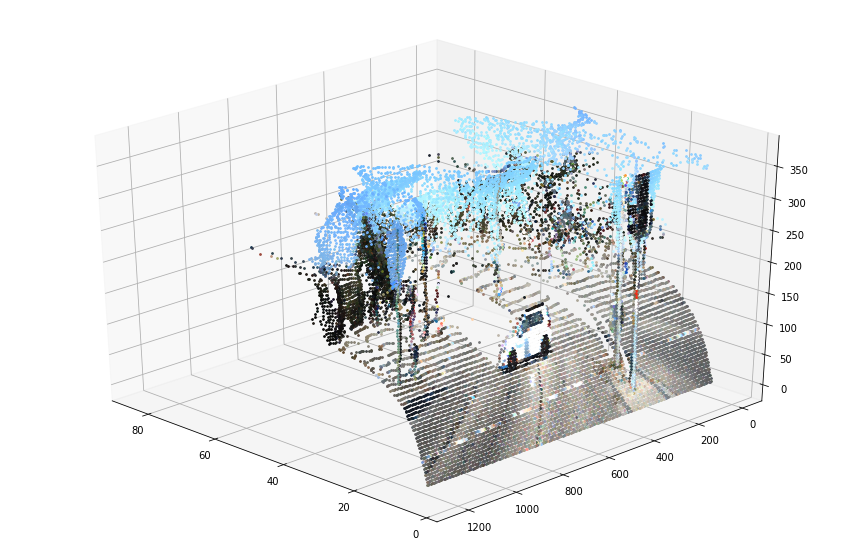

In [112]:
ax.view_init(30, 135)
fig